## Lecture 3 - Part 2

1. Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.

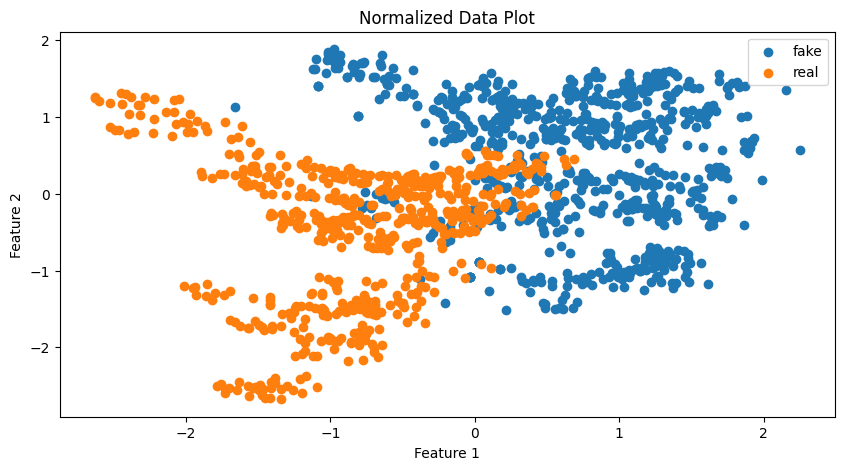

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import importlib
import MachineLearningModel

importlib.reload(MachineLearningModel)
from MachineLearningModel import LogisticRegression

with open('./resources/datasets/banknote_authentication.csv', 'r') as file:
    reader = csv.reader(file)
    data = np.array([row for row in reader], dtype=float)

X = data[:, :-1]
y = data[:, -1]

model = LogisticRegression()
X_normalized = model.normalize(X)

plt.figure(figsize=(10, 5))
for class_value in np.unique(y):
    subset = X_normalized[y == class_value]
    label = 'real' if int(class_value) == 1 else 'fake'
    plt.scatter(subset[:, 0], subset[:, 1], label=label)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Normalized Data Plot')
plt.show()

2.  Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

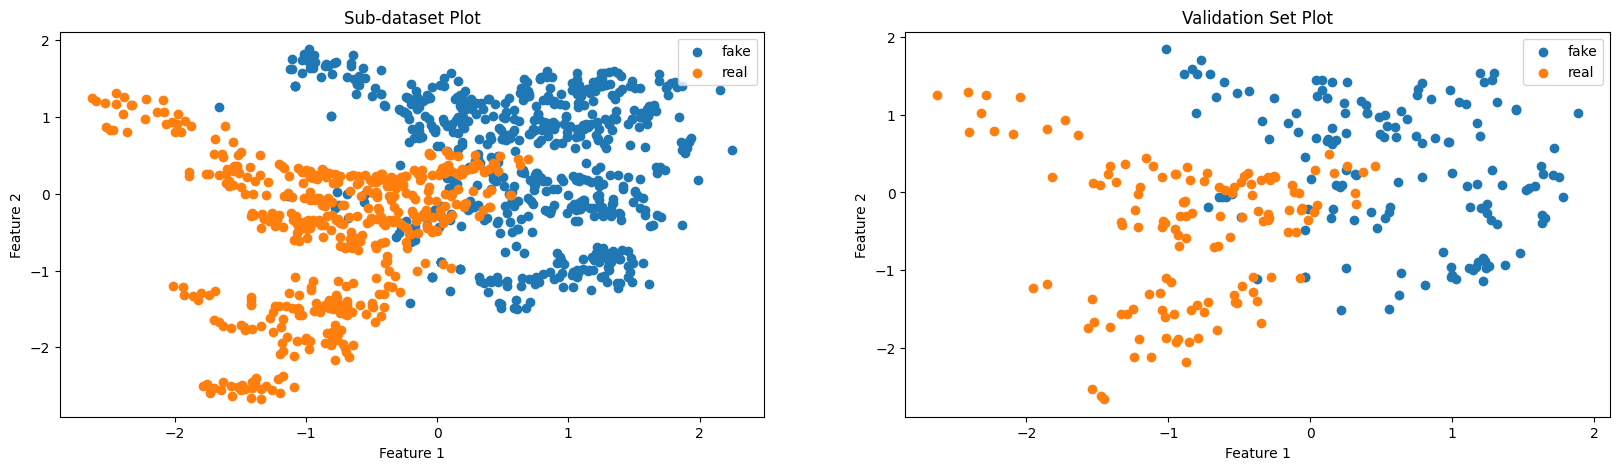

In [3]:
np.random.seed(42)  # For reproducibility
indices = np.random.permutation(len(X_normalized))
split_index = int(0.8 * len(X_normalized))

sub_dataset_indices = indices[:split_index]
validation_set_indices = indices[split_index:]

X_sub_dataset = X_normalized[sub_dataset_indices]
y_sub_dataset = y[sub_dataset_indices]

X_validation_set = X_normalized[validation_set_indices]
y_validation_set = y[validation_set_indices]

plt.figure(figsize=(20, 5))

# Sub-dataset plot
plt.subplot(1, 2, 1)
for class_value in np.unique(y_sub_dataset):
    subset = X_sub_dataset[y_sub_dataset == class_value]
    label = 'real' if int(class_value) == 1 else 'fake'
    plt.scatter(subset[:, 0], subset[:, 1], label=label)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Sub-dataset Plot')

# Validation set plot
plt.subplot(1, 2, 2)
for class_value in np.unique(y_validation_set):
    subset = X_validation_set[y_validation_set == class_value]
    label = 'real' if int(class_value) == 1 else 'fake'
    plt.scatter(subset[:, 0], subset[:, 1], label=label)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Validation Set Plot')

plt.show()

3. Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

A learning rate of 20 with 25 iterations appears to strike the right balance between early convergence and model stability for logistic regression. For non-linear logistic regression, the optimal configuration is a learning rate of 20 with 56 iterations. Higher learning rates tend to overshoot and struggle with fitting the dataset, while lower rates are less efficient.

To ensure robustness, we will use a learning rate of 20 with 50 iterations for logistic regression and a learning rate of 20 with 100 iterations for non-linear logistic regression. These rounded numbers are easier to understand and provide a buffer for potential future adjustments that might affect model stability.

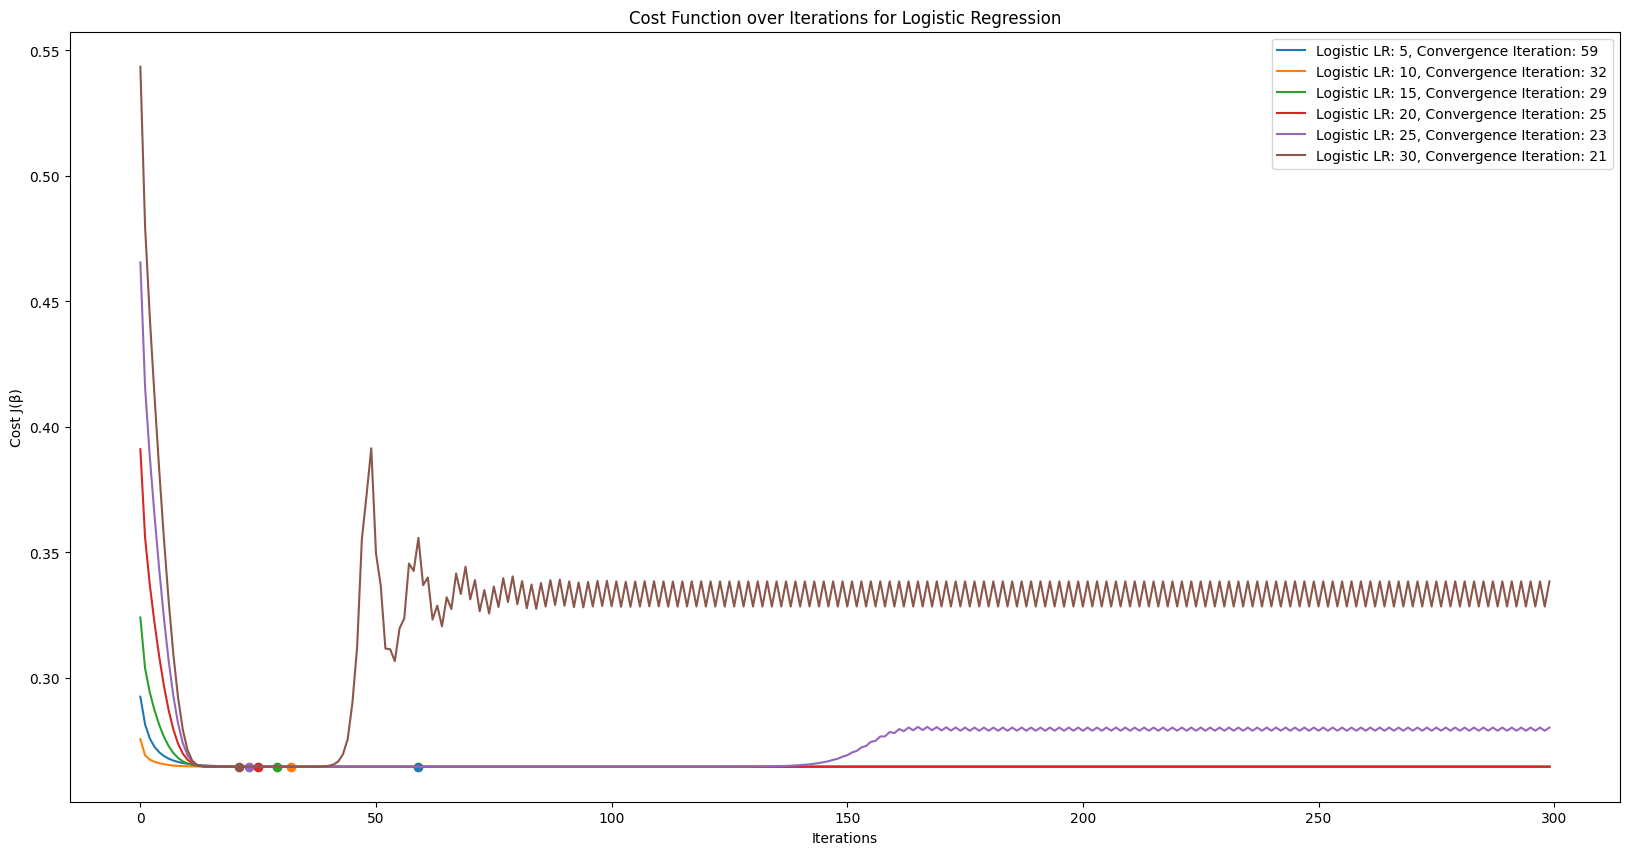

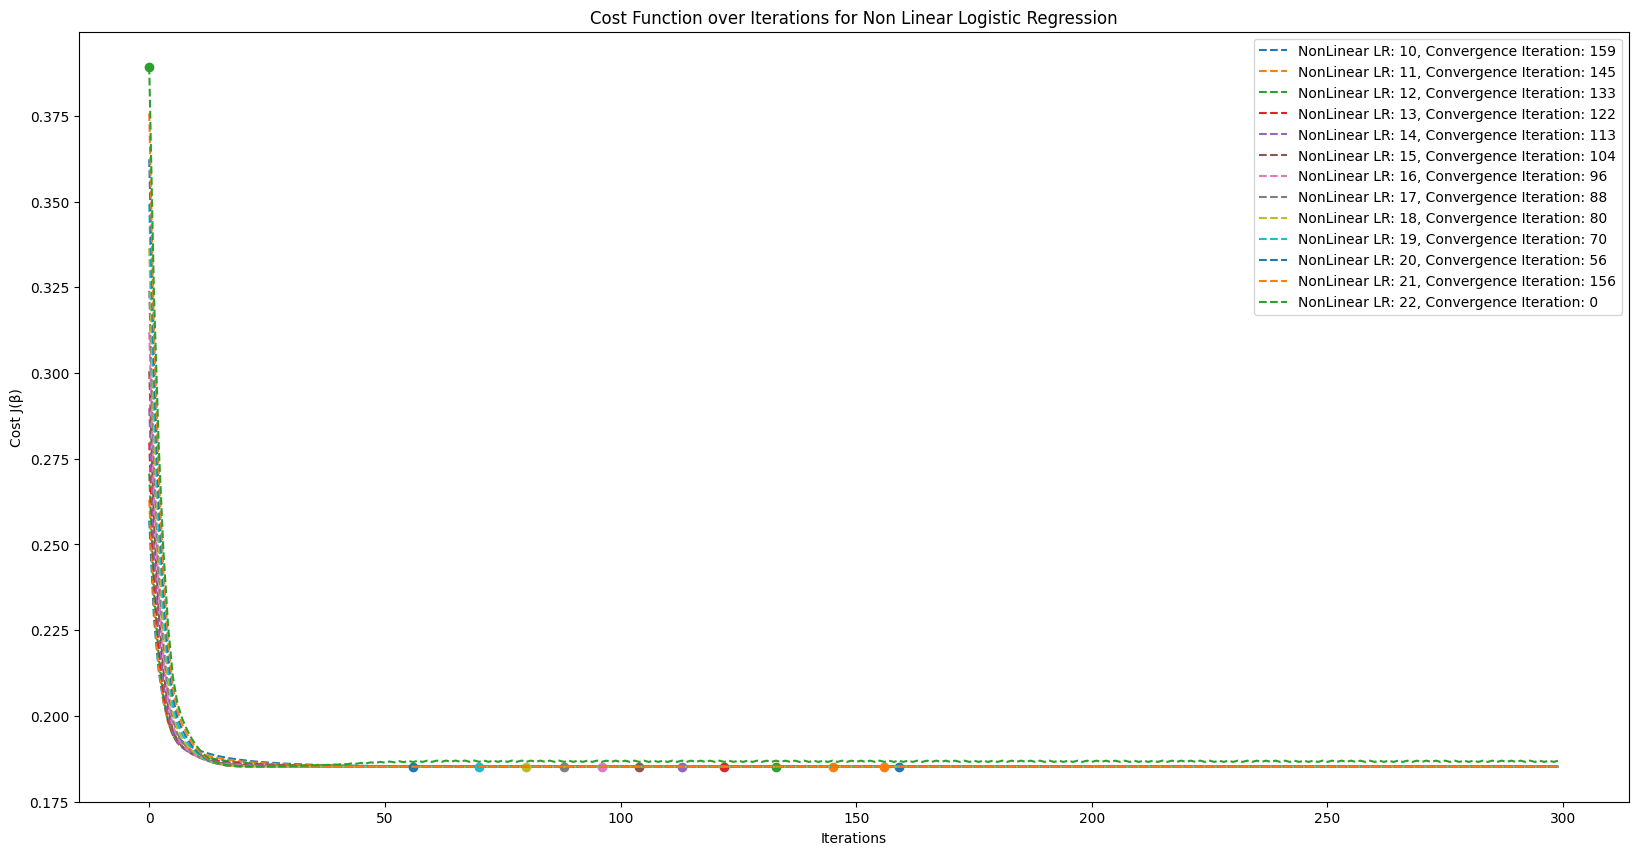

In [4]:
importlib.reload(MachineLearningModel)
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression

linear_rates = np.arange(5, 35, 5)
nonlinear_rates = np.arange(10, 23, 1)

# Plot for Logistic Regression
plt.figure(figsize=(20, 10))
for lr in linear_rates:
    model = LogisticRegression(learning_rate=lr, num_iterations=300)
    model.fit(X_sub_dataset, y_sub_dataset)
    
    line, = plt.plot(model.cost_history, label=f'Logistic LR: {lr}, Convergence Iteration: {model.convergence_iteration}')
    plt.plot(model.convergence_iteration, model.cost_history[model.convergence_iteration], 'o', color=line.get_color())

plt.xlabel('Iterations')
plt.ylabel('Cost J(β)')
plt.title('Cost Function over Iterations for Logistic Regression')
plt.legend()
plt.show()

# Plot for NonLinear Logistic Regression
plt.figure(figsize=(20, 10))
for lr in nonlinear_rates:
    model = NonLinearLogisticRegression(degree=2, learning_rate=lr, num_iterations=300)
    model.fit(X_sub_dataset, y_sub_dataset)
    
    line, = plt.plot(model.cost_history, linestyle='--', label=f'NonLinear LR: {lr}, Convergence Iteration: {model.convergence_iteration}')
    plt.plot(model.convergence_iteration, model.cost_history[model.convergence_iteration], 'o', color=line.get_color())
plt.xlabel('Iterations')
plt.ylabel('Cost J(β)')
plt.title('Cost Function over Iterations for Non Linear Logistic Regression')
plt.legend()
plt.show()

4. Create a method that, given the sub-dataset, it will randomly split it into 80% for training
and 20% for testing.

In [5]:
def split_dataset(X, y, test_size=0.2, seed=None):
    """
    Splits the dataset into training and testing sets.

    Parameters:
    X (array-like): Features dataset.
    y (array-like): Labels dataset.
    test_size (float): Proportion of the dataset to include in the test split.
    random_state (int or None): Seed for the random number generator.

    Returns:
    X_train, X_test, y_train, y_test: Split datasets.
    """
    np.random.seed(seed)
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    X = X[indices]
    y = y[indices]
    
    split_index = int((1 - test_size) * X.shape[0])
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    return X_train, X_test, y_train, y_test

5. Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

If you run the code cell below multiple times, you will observe that the mean accuracy for the logistic regression model is approximately 0.88 in most runs. In contrast, the mean accuracy for the non-linear logistic regression model is around 0.92 in the majority of runs. Additionally, the accuracy values for the non-linear logistic regression model are slightly less dispersed. Although the plot may exaggerate the differences due to the y-axis spanning only 0.1, it is evident that both models are qualitatively similar but not identical. The non-linear model performs slightly better and is generally preferred over the linear one.

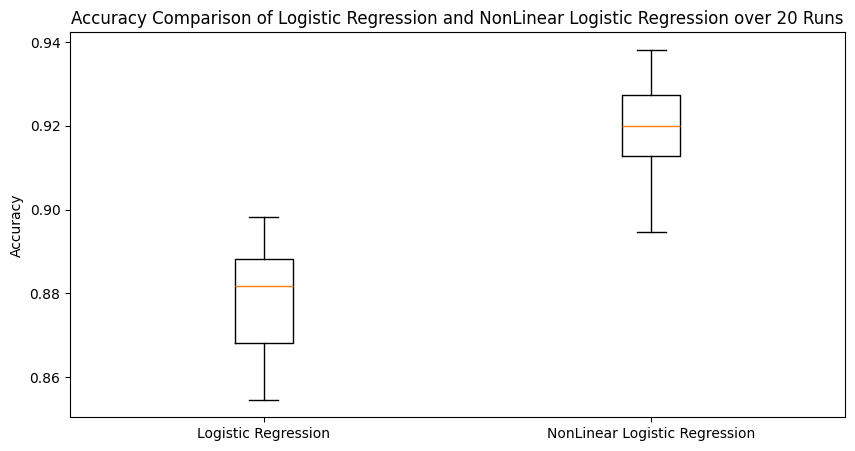

In [6]:
importlib.reload(MachineLearningModel)
from MachineLearningModel import LogisticRegression, NonLinearLogisticRegression

num_experiments = 20

linear_accuracies = []
nonlinear_accuracies = []

for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_dataset(X_normalized, y, test_size=0.2)

    # Logistic Regression
    linear_model = LogisticRegression(learning_rate=20, num_iterations=50)
    linear_model.fit(X_train, y_train)
    linear_accuracy = linear_model.evaluate(X_test, y_test)
    linear_accuracies.append(linear_accuracy)
    
    # NonLinear Logistic Regression
    nonlinear_model = NonLinearLogisticRegression(degree=2, learning_rate=20, num_iterations=100)
    nonlinear_model.fit(X_train, y_train)
    nonlinear_accuracy = nonlinear_model.evaluate(X_test, y_test)
    nonlinear_accuracies.append(nonlinear_accuracy)

# Plotting the box plot for accuracies
plt.figure(figsize=(10, 5))
plt.boxplot([linear_accuracies, nonlinear_accuracies], labels=['Logistic Regression', 'NonLinear Logistic Regression'])
plt.ylabel('Accuracy')
plt.title(f'Accuracy Comparison of Logistic Regression and NonLinear Logistic Regression over {num_experiments} Runs')
plt.show()

6. Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

The NonLinear Logistic Regression model demonstrates a higher accuracy of 0.924 compared to the Logistic Regression model's accuracy of 0.898. Additionally, the NonLinear model has a higher rate of certainty with its predictions (85.51%) than the linear model (73.20%). Given these results, the NonLinear Logistic Regression model is generally preferred over the linear one due to its superior performance and higher confidence in predictions.

Logistic Regression Accuracy: 0.898
Logistic Regression Certain Categories Percentage: 73.20%
Logistic Regression Uncertain Categories Percentage: 26.80%
NonLinear Logistic Regression Accuracy: 0.924
NonLinear Logistic Regression Certain Categories Percentage: 85.51%
NonLinear Logistic Regression Uncertain Categories Percentage: 14.49%


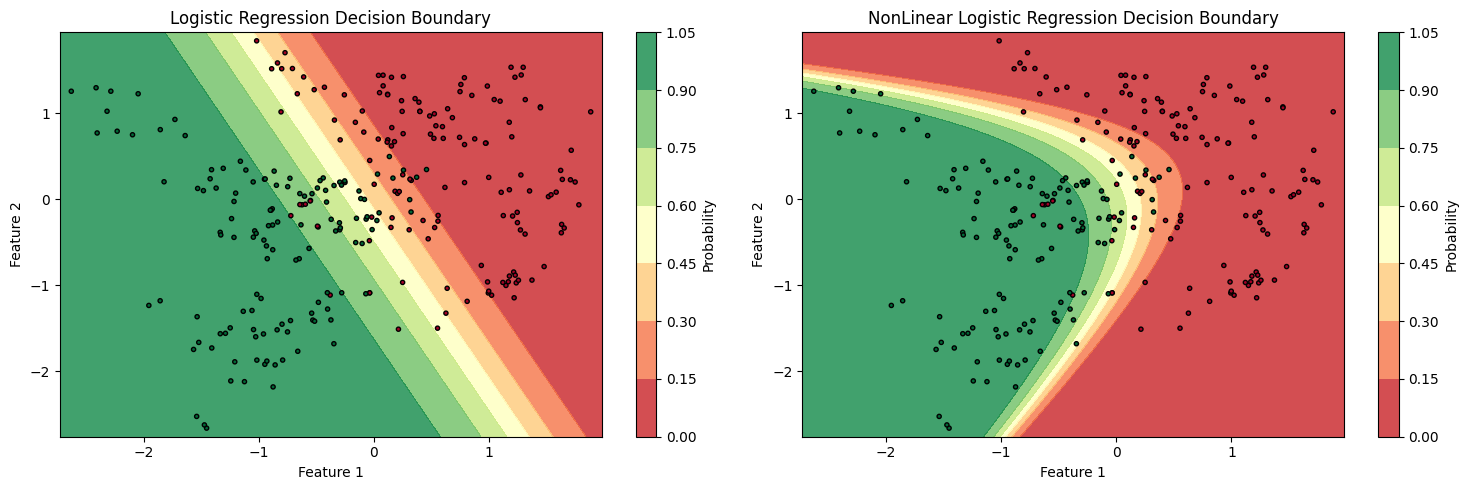

In [7]:
from matplotlib.colors import ListedColormap

h = .01  # step size in the mesh
x_min, x_max = X_validation_set[:, 0].min() - 0.1, X_validation_set[:, 0].max() + 0.1
y_min, y_max = X_validation_set[:, 1].min() - 0.1, X_validation_set[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Logistic Regression Decision Boundary
linear_model.fit(X_sub_dataset, y_sub_dataset)
linear_accuracy = linear_model.evaluate(X_validation_set, y_validation_set)
print(f"Logistic Regression Accuracy: {linear_accuracy:.3f}")

Z = linear_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Count number of points classified into each category of probabilities
prob_categories = [0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05]
total_points = Z.size
counts = {f"< {cat}": np.sum((Z < cat) & (Z >= (cat - 0.15))) for cat in prob_categories}
percentages = {k: (v / total_points) * 100 for k, v in counts.items()}
certain_counts = counts["< 0.15"] + counts["< 1.05"]
uncertain_counts = total_points - certain_counts
extreme_percentage = (certain_counts / total_points) * 100
uncertain_percentage = (uncertain_counts / total_points) * 100
print(f"Logistic Regression Certain Categories Percentage: {extreme_percentage:.2f}%")
print(f"Logistic Regression Uncertain Categories Percentage: {uncertain_percentage:.2f}%")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlGn)
plt.scatter(X_validation_set[:, 0], X_validation_set[:, 1], c=y_validation_set, edgecolor='k', marker='.', cmap=plt.cm.RdYlGn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
cbar = plt.colorbar(contour, ax=plt.gca(), orientation='vertical')
cbar.set_label('Probability')

nonlinear_model.fit(X_sub_dataset, y_sub_dataset)
nonlinear_accuracy = nonlinear_model.evaluate(X_validation_set, y_validation_set)
print(f"NonLinear Logistic Regression Accuracy: {nonlinear_accuracy:.3f}")

Z = nonlinear_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Count number of points classified into each category of probabilities
counts = {f"< {cat}": np.sum((Z < cat) & (Z >= (cat - 0.15))) for cat in prob_categories}
percentages = {k: (v / total_points) * 100 for k, v in counts.items()}
certain_counts = counts["< 0.15"] + counts["< 1.05"]
uncertain_counts = total_points - certain_counts
extreme_percentage = (certain_counts / total_points) * 100
uncertain_percentage = (uncertain_counts / total_points) * 100
print(f"NonLinear Logistic Regression Certain Categories Percentage: {extreme_percentage:.2f}%")
print(f"NonLinear Logistic Regression Uncertain Categories Percentage: {uncertain_percentage:.2f}%")

plt.subplot(1, 2, 2)
contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlGn)
plt.scatter(X_validation_set[:, 0], X_validation_set[:, 1], c=y_validation_set, edgecolor='k', marker='.', cmap=plt.cm.RdYlGn)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('NonLinear Logistic Regression Decision Boundary')
cbar = plt.colorbar(contour, ax=plt.gca(), orientation='vertical')
cbar.set_label('Probability')

plt.tight_layout()
plt.show()